### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [7]:
white_noise = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [8]:
df['white_noise'] = white_noise

C:\Windows\Temp\ipykernel_15164\534777122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['white_noise'] = white_noise


In [9]:
df.describe()

,market_value,white_noise
count,5021.000000,5021.000000
mean,1091.651926,1083.592570
std,292.559287,295.050537
min,438.920000,43.241759
25%,914.620000,883.233123
50%,1144.650000,1086.032799
75%,1316.280729,1280.524869
max,1570.252238,2121.532011


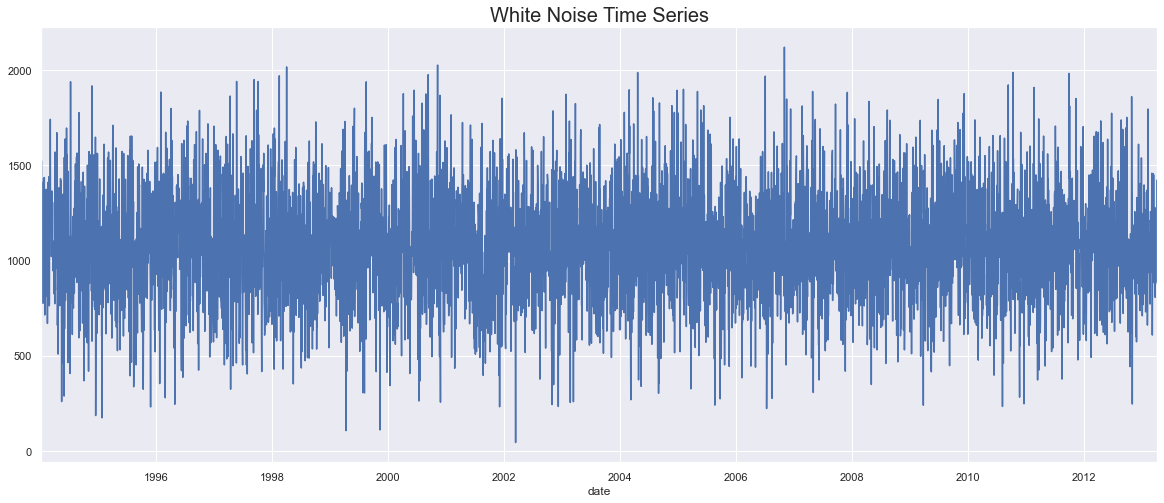

In [15]:
plt.figure(figsize = (20,8))
df.white_noise.plot()
plt.title("White Noise Time Series", size=20)
plt.show()

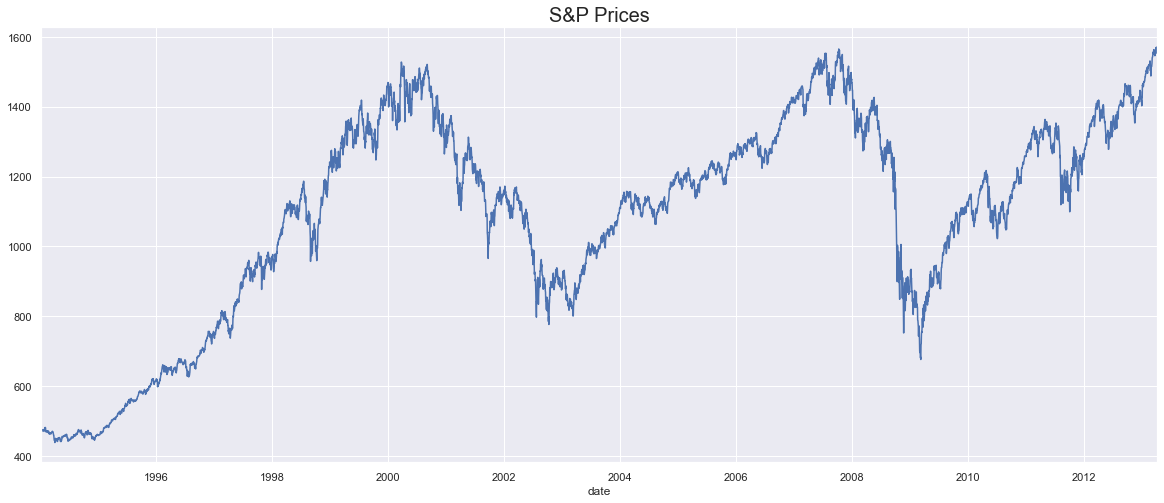

In [17]:
plt.figure(figsize = (20,8))
df.market_value.plot()
plt.ylim(,
plt.title("S&P Prices", size=20)
plt.show()

#### Smaller jumps between periods for S&P values

### Random Walk

### Stationarity

### Seasonality

### ACF

### PACF